In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.gridspec import GridSpec
import numpy as np
from scipy.signal import medfilt
import japanize_matplotlib
from mcp_persor import BVHparser


In [6]:
def to_joint_name(joint):
    if joint == 'root':
        return '腰'
    if joint == 'torso_1':
        return '腹部(下)'
    if joint == 'torso_2':
        return '腹部(中1)'
    if joint == 'torso_3':
        return '腹部(中2)'
    if joint == 'torso_4':
        return '腹部(上)'
    if joint == 'torso_5':
        return '胸部(下)'
    if joint == 'torso_6':
        return '胸部(上)'
    if joint == 'torso_7':
        return '首元'
    if joint == 'neck_1':
        return '首(下)'
    if joint == 'neck_2':
        return '首(上)'
    if joint == 'head':
        return '頭'
    if joint == 'l_shoulder':
        return '左肩'
    if joint == 'l_up_arm':
        return '左上腕'
    if joint == 'l_low_arm':
        return '左腕'
    if joint == 'l_hand':
        return '左手'
    if joint == 'r_shoulder':
        return '右肩'
    if joint == 'r_up_arm':
        return '右上腕'
    if joint == 'r_low_arm':
        return '右腕'
    if joint == 'r_hand':
        return '右手'
    if joint == 'l_up_leg':
        return '左膝'
    if joint == 'l_low_leg':
        return '左足首'
    if joint == 'l_foot':
        return '左足'
    if joint == 'l_toes':
        return '左足先'
    if joint == 'r_up_leg':
        return '右膝'
    if joint == 'r_low_leg':
        return '右足首'
    if joint == 'r_foot':
        return '右足'
    if joint == 'r_toes':
        return '右足先'
    return joint

def plot_joint(bvhp, joint, xlim=(0, 0), ylim=(0, 0), figsize=(12, 3), diff=0, labels=None, is_position=False):
    df = bvhp.get_joint_motion_df(joint, mode='relative')

    fig = plt.figure(figsize=figsize)
    gs = GridSpec(1, 2, width_ratios=[11, 1], wspace=0.5)
    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])

    joint_name = to_joint_name(joint)
    ax1.set_title(f'{joint_name} の位置' if is_position else f'{joint_name} の回転')
    ax1.set_xlabel('time [s]')
    ax1.set_ylabel('rotation [deg]' if is_position else 'position [mm]')
    ax1.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5)

    if xlim[0] < xlim[1]:
        ax1.set_xlim(xlim[0], xlim[1])

    if ylim[0] < ylim[1]:
        ax1.set_ylim(ylim[0], ylim[1])

    r_heads = ['Xrotation', 'Yrotation', 'Zrotation']
    p_heads = ['Xposition', 'Yposition', 'Zposition']
    heads = p_heads if is_position else r_heads
    for head in heads:
        ax1.plot(df['time'], df[head], label=head)

    colors = ['mediumblue', 'orange', 'green', 'red', 'purple', 'gray', 'olive', 'cyan']
    if labels:
        for i, l in enumerate(labels):
            color = colors[i % len(colors)]
            ax2.scatter([], [], color=color, label=l)

            for s, e in labels[l]:
                ax1.axvspan(s + diff, e + diff, color=color, alpha=0.2)
                

    ax1.legend()
    legend = ax2.legend()
    ax2.axis('off')
    for handle in legend.legend_handles:
        handle.set_alpha(0.5)
    plt.show()


In [7]:
bvhp = BVHparser('./logs/1.bvh')
# [print(j) for j in bvhp.get_joints() if j[0] != '_']

labels1 = {
    '本を取る': [
        [20, 25],
        [35, 40],
        [65, 68],
    ],
    '本を置く': [
        [29, 32],
    ],
    'しゃがむ': [
        [60, 65],
    ],
    'うどんを取る': [
        [95, 97],
    ],
    '冷蔵庫を開ける': [
        [110, 113]
    ],
    '冷蔵庫を閉める': [
        [114, 118]
    ],
}

# plot_joint(bvhp, 'root', (0, 150), (0, 0), labels=labels1, is_position=True, diff=6)
# for j in bvhp.get_joints():
#     if j[0] == '_':
#         continue

#     plot_joint(bvhp, j, (0, 150), (0, 0), labels=labels1, diff=6)


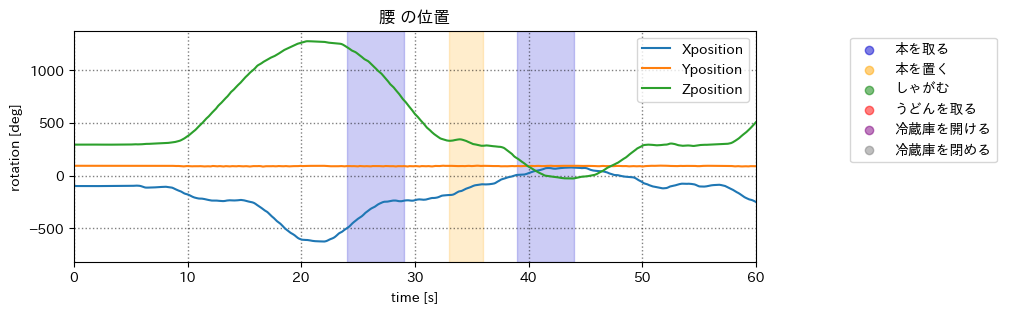

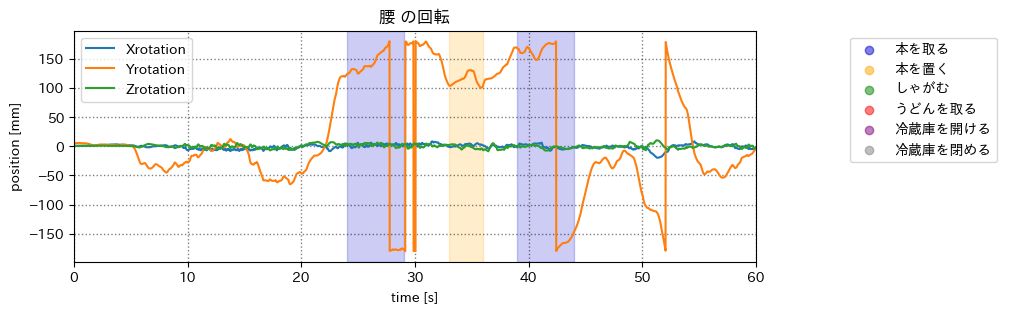

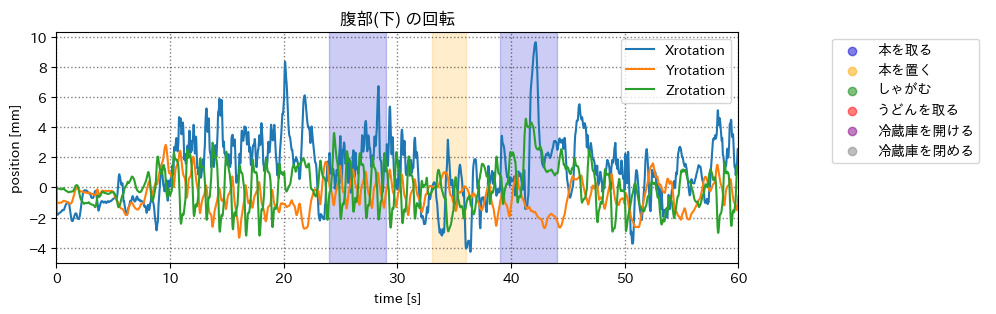

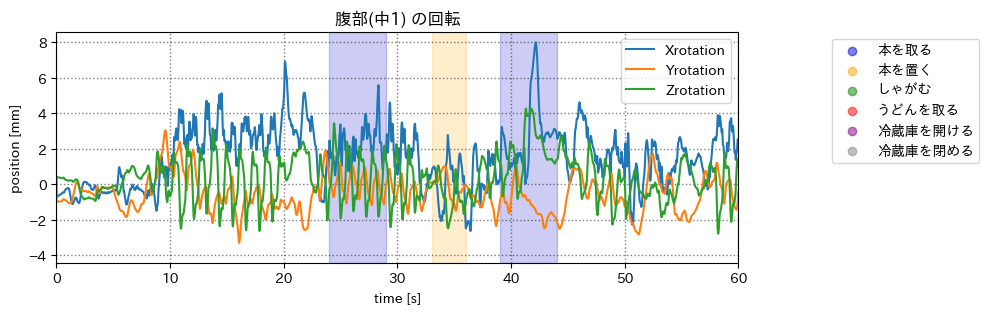

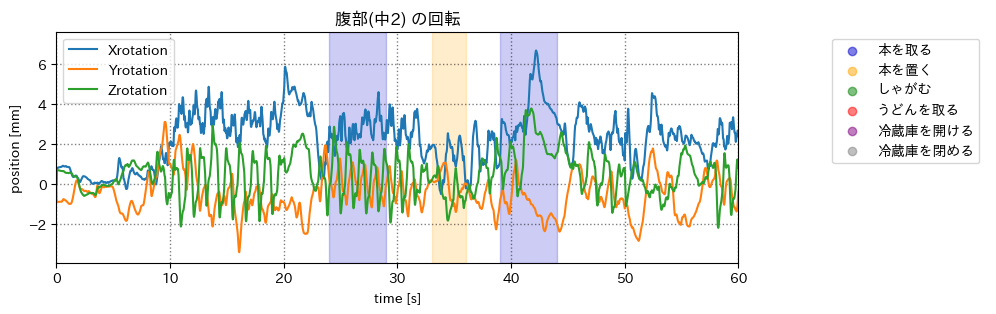

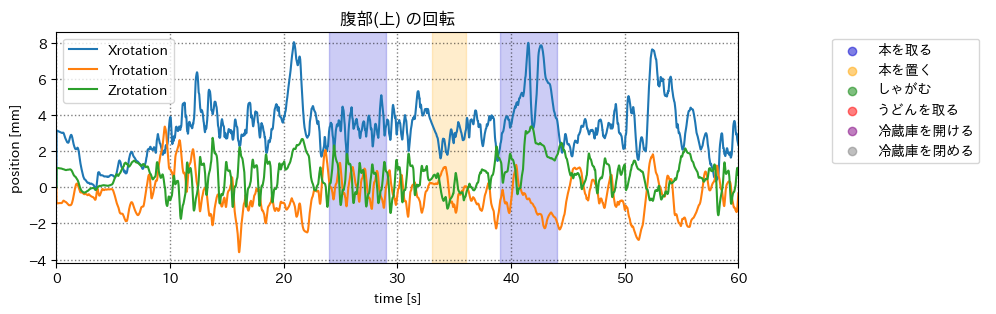

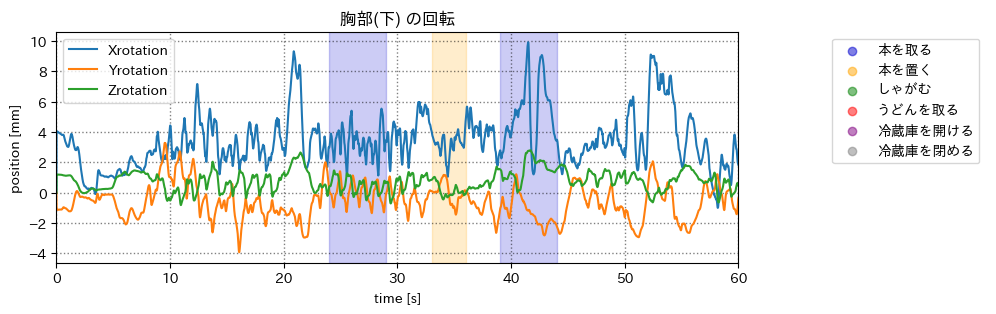

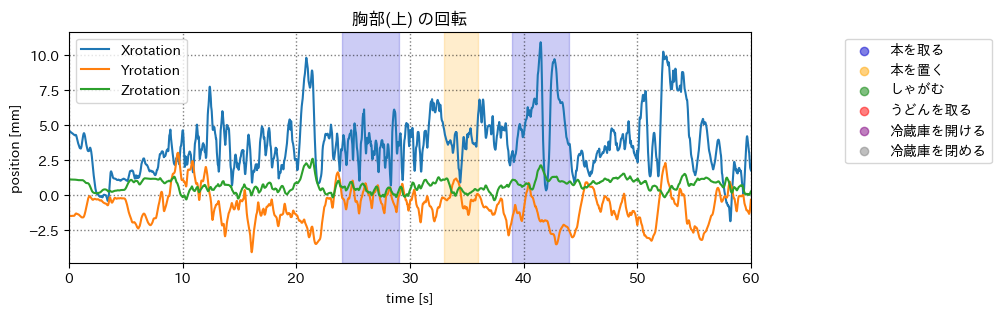

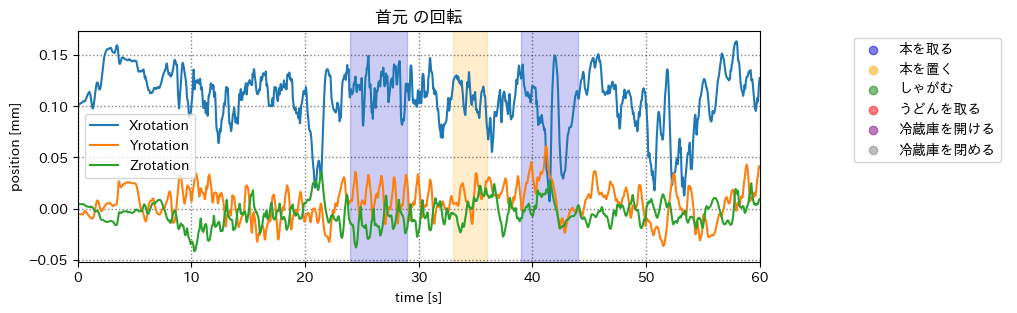

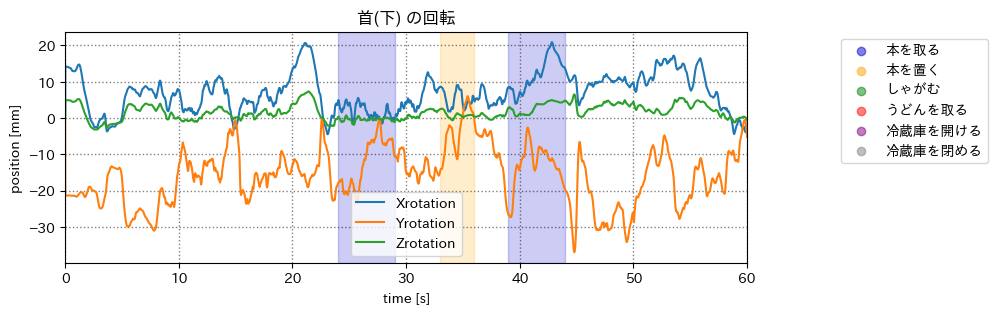

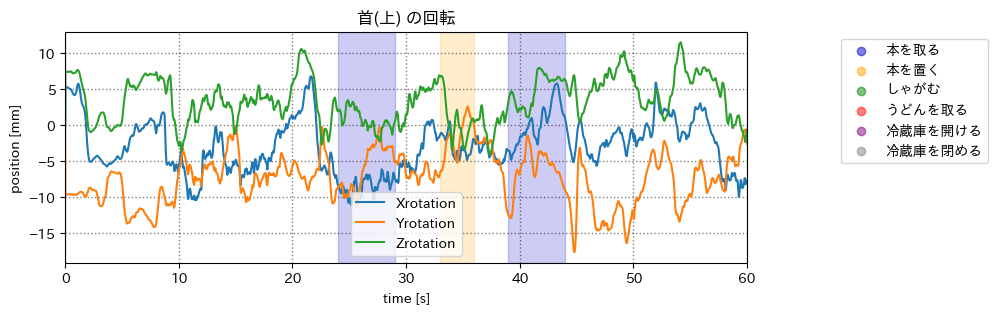

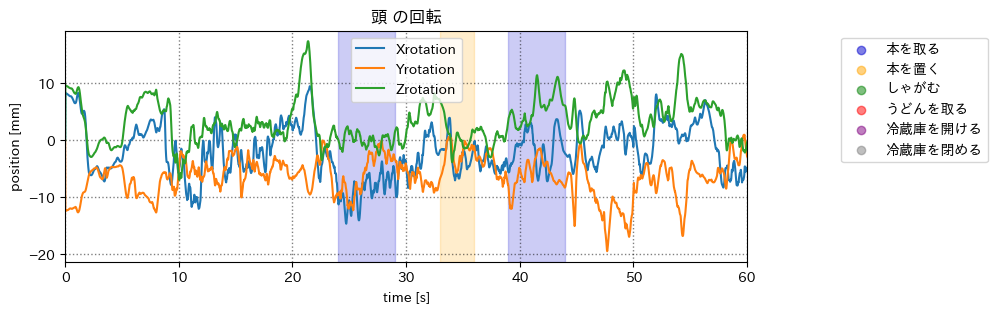

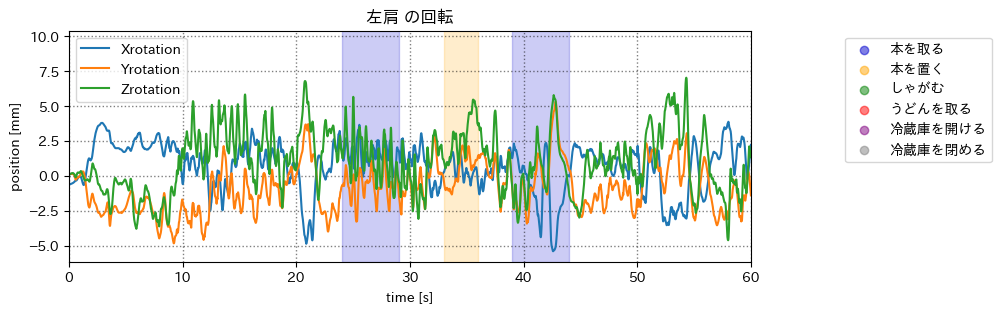

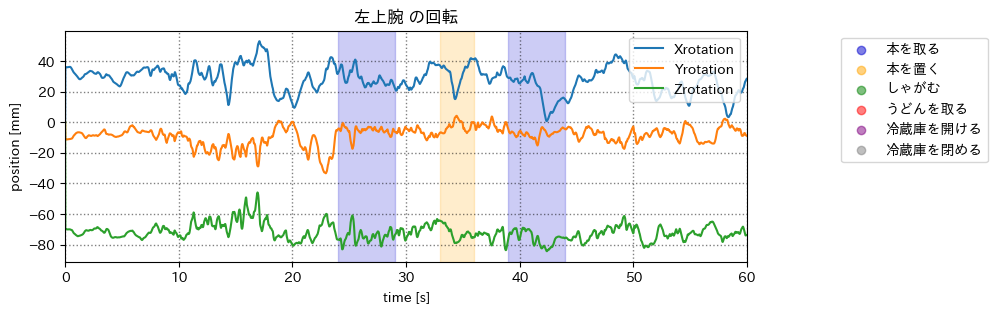

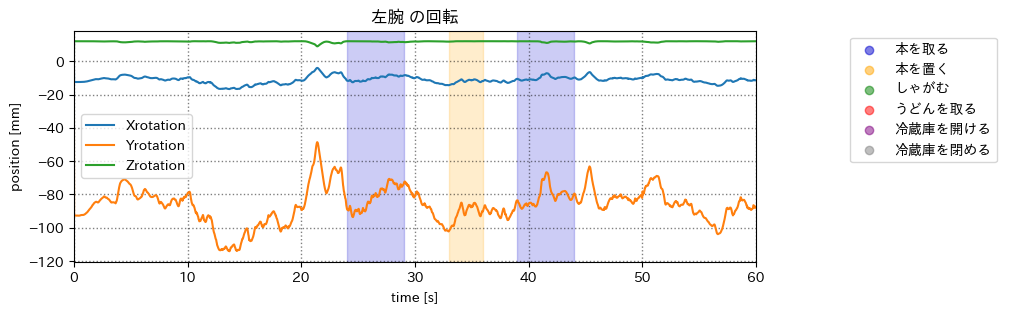

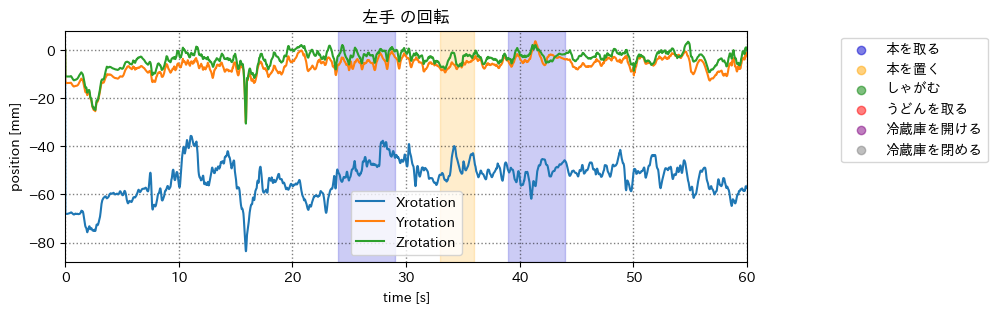

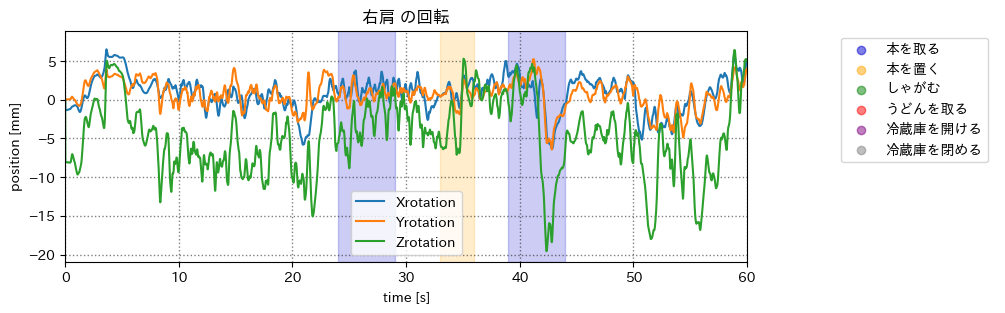

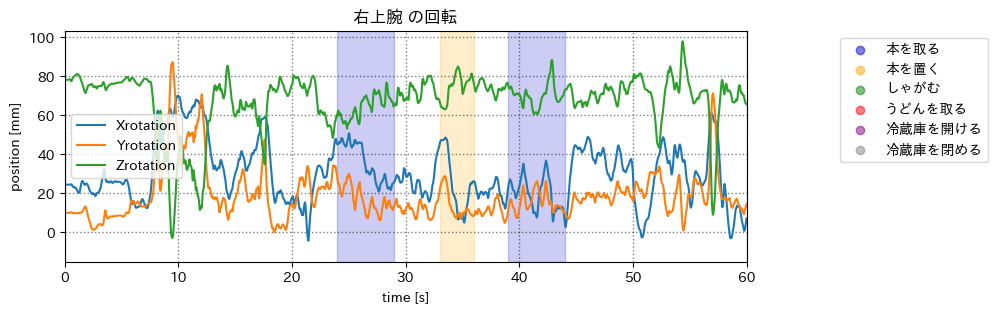

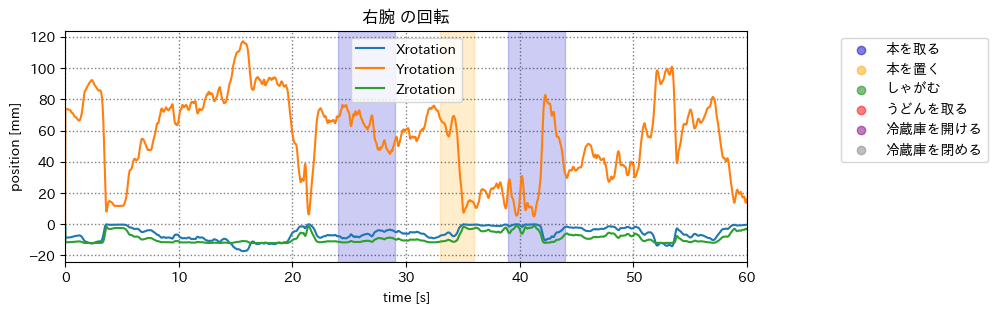

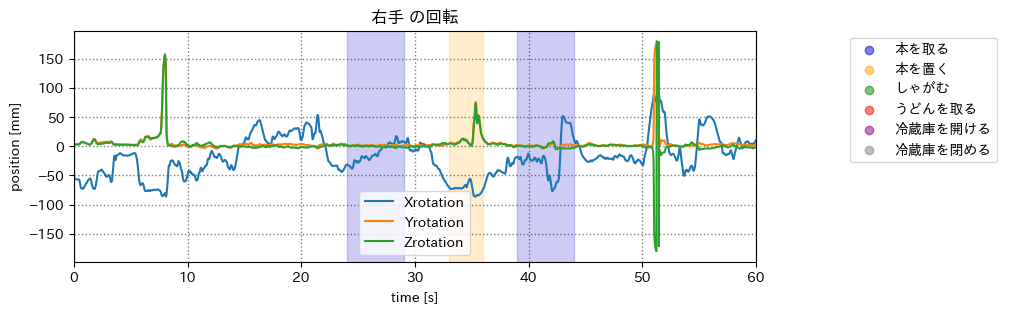

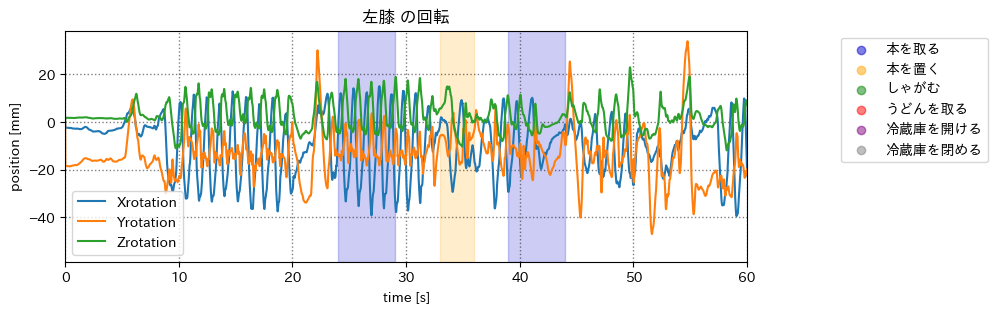

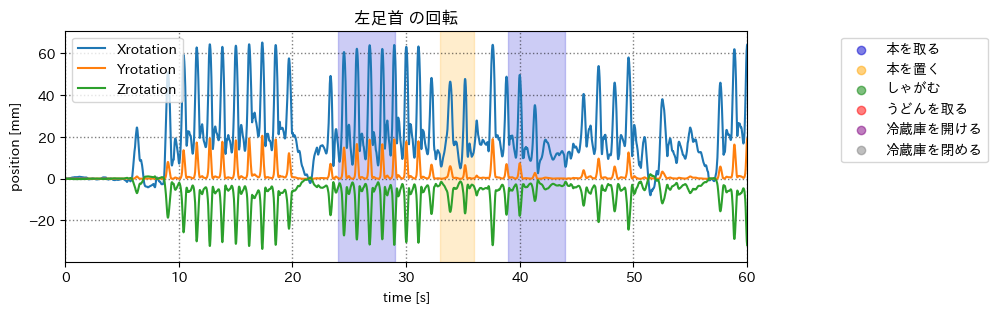

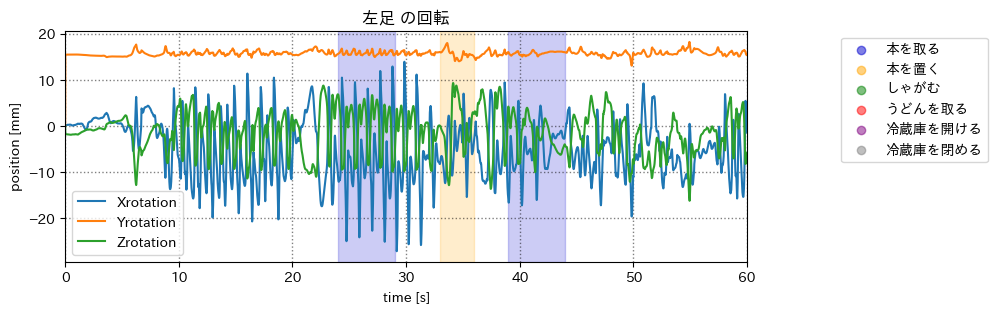

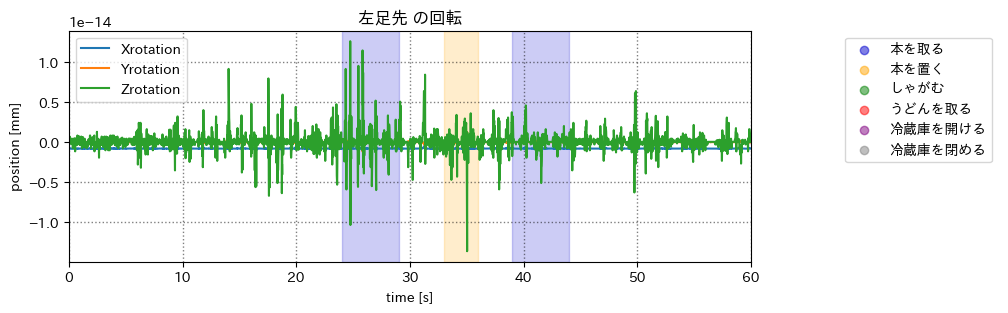

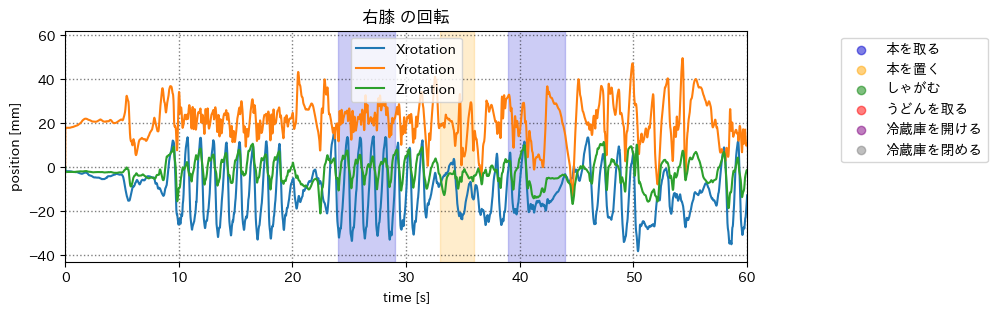

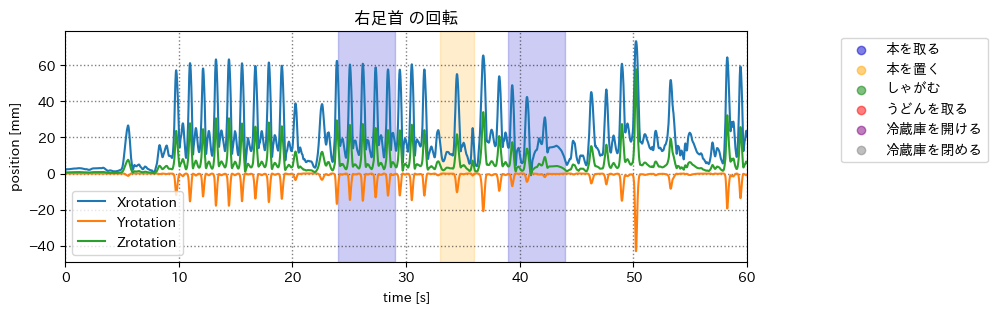

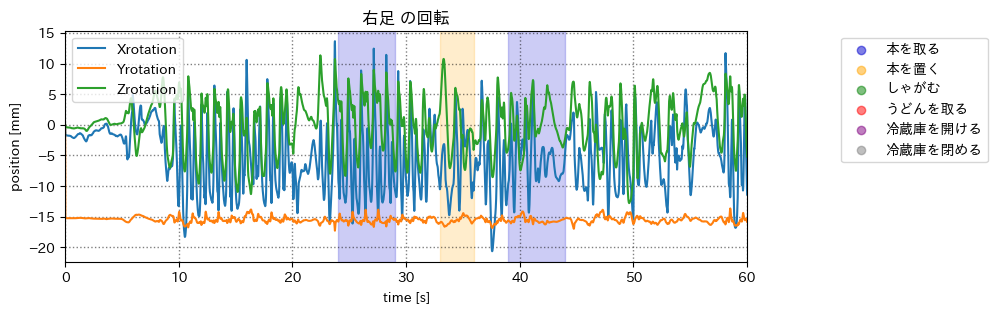

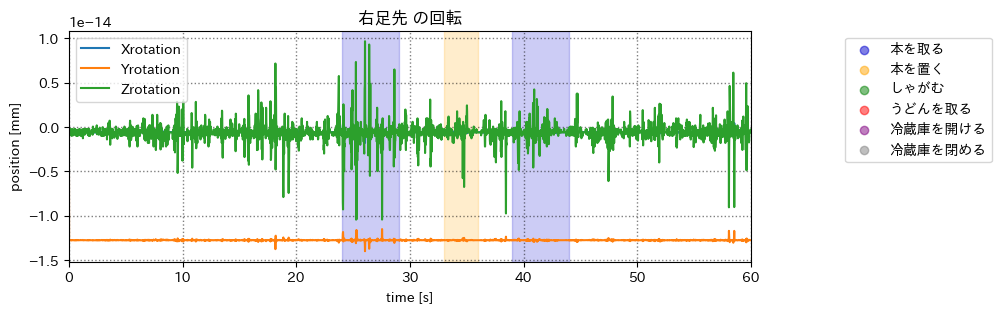

In [8]:
bvhp = BVHparser('./logs/4.bvh')
# [print(j) for j in bvhp.get_joints() if j[0] != '_']

labels2 = {
    '冷蔵庫を開ける': [
        [14, 17],
        [32, 34],
        [49, 51]
    ],
    '冷蔵庫を閉める': [
        [22, 24],
        [38, 40],
        [53, 54]
    ],
    '冷蔵庫から取り出す': [
        [18, 21]
    ],
    '冷蔵庫に戻す': [
        [35, 37]
    ],
    '机に置く': [
        [26, 28]
    ]
}

plot_joint(bvhp, 'root', (0, 60), (0, 0), labels=labels1, is_position=True, diff=4)
for j in bvhp.get_joints():
    if j[0] == '_':
        continue

    plot_joint(bvhp, j, (0, 60), (0, 0), labels=labels1, diff=4)
